# Data Collection/Ingestion

**Expected Outcomes for Data Collection/Ingestion**
- Understand the problem statement: Perform sentiment analysis on Amazon product reviews.
- Gather the dataset (Amazon product reviews) and check its structure.

In [1]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [59]:
%pip install transformers


   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/10.0 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/10.0 MB 1.6 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/10.0 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/10.0 MB 1.8 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/10.0 MB 1.8 MB/s eta 0:00:05
   ----------- ---------------------------- 2.9/10.0 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/10.0 MB 1.7 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/10.0 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/10.0 MB 1.7 MB/s eta 0:00:04
   ----------------

In [2]:
# Importing all the libraries required for the whole project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import display
from collections import Counter
from wordcloud import WordCloud



In [3]:

# Load the dataset
df = pd.read_csv("Reviews.csv")

# Display first 5 rows
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
# Displaying the last 5 rows
print(df.tail())

            Id   ProductId          UserId              ProfileName  \
568449  568450  B001EO7N10  A28KG5XORO54AY         Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z            pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH  Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                 srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
568449                 Will not do without   
568450                        

In [5]:
# Displays the title of cokumns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

**Dataset Attributes**
- **Id**: Unique identifier for each review.
- **ProductId**: ID of the reviewed product.
- **UserId**: Unique identifier for the reviewer.
- **ProfileName**: Name of the reviewer.
- **HelpfulnessNumerator/Denominator**: Helpfulness ratings of the review.
- **Score**: Rating (1 to 5), serves as the sentiment label.
- **Time**: Timestamp of the review.
- **Summary**: Short title of the review.
- **Text**: Full review content.

In [6]:
# checking data types of various columns
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [7]:
# Cheking if there are null values in our dataset
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Exploratory Data Analysis (EDA)

**Expected Outcomes for Exploratory Data Analysis (EDA)**
- Clean and format the data, handle missing values, and remove duplicates.
- Perform visualizations on review lengths, word frequencies, sentiment distribution, etc.

In [8]:
duplicate_rows = df[df.duplicated(subset=['UserId', 'ProductId', 'Text'], keep=False)]
print("The number of duplicate rows in the dataset is:", duplicate_rows.shape[0])
print("Duplicate Rows in Dataset:\n", duplicate_rows)

The number of duplicate rows in the dataset is: 2122
Duplicate Rows in Dataset:
             Id   ProductId          UserId                   ProfileName  \
466        467  B000G6RYNE  A3PJZ8TU8FDQ1K                  Jared Castle   
574        575  B000G6RYNE  A3PJZ8TU8FDQ1K                  Jared Castle   
603        604  B000G6RYNE  A3PJZ8TU8FDQ1K                  Jared Castle   
2334      2335  B0001FQVCK   A5D06XJHDXK75                         C. Po   
2336      2337  B0001FQVCK   A5D06XJHDXK75                         C. Po   
...        ...         ...             ...                           ...   
567984  567985  B0030VJ8YU   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"   
568007  568008  B0030VJ8YU  A20P8VC55KPPCT                        FL Mom   
568008  568009  B0030VJ8YU   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"   
568017  568018  B0030VJ8YU  A20P8VC55KPPCT                        FL Mom   
568062  568063  B0030VJ8YU   ATIHDHZYNQ0EI  Kristen O'donnell "twinsmom"   

      

In [9]:
# Counting duplicate and unique values
num_duplicates = df.duplicated(subset=['UserId', 'ProductId', 'Text']).sum()
num_unique = df.shape[0] - num_duplicates

print(f"Number of duplicate reviews: {num_duplicates}")
print(f"Number of unique reviews: {num_unique}")

Number of duplicate reviews: 1309
Number of unique reviews: 567145


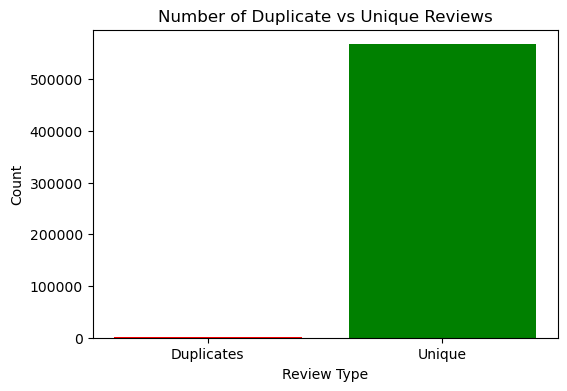

In [10]:
# Creating a bar chart
plt.figure(figsize=(6, 4))
plt.bar(["Duplicates", "Unique"], [num_duplicates, num_unique], color=['red', 'green'])

# Adding labels and title
plt.xlabel("Review Type")
plt.ylabel("Count")
plt.title("Number of Duplicate vs Unique Reviews")
plt.show()

In [11]:
# Removing duplicates, keeping the first occurrence
df = df.drop_duplicates(subset=['UserId', 'ProductId', 'Text'], keep='first')
print(f"Dataset after removing duplicates: {df.shape}")

Dataset after removing duplicates: (567145, 10)


In [12]:
# Check for null values in the dataset
null_values = df.isnull().sum()
print(null_values[null_values > 0])

ProfileName    26
Summary        27
dtype: int64


Since we have kept all the unique values and removed only duplicate values there are still null values present in the dataset.

In [13]:
# List all rows containing null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

            Id   ProductId          UserId                     ProfileName  \
10616    10617  B002DHN956  A1LSYR30XW7CFT                             NaN   
25509    25510  B000LKZB4Y  A36BVYD0NT7Z0F                             NaN   
33958    33959  B00412W76S  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
38874    38875  B000AYDGZ2  A36BVYD0NT7Z0F                             NaN   
40548    40549  B00020HHRW  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
47923    47924  B004SRH2B6  A2DEHJJIEAPPBF                             NaN   
49800    49801  B000CRHQN0  A2LYFY32LXQDON                             NaN   
67077    67078  B0006348H2  A2P0P67Y55SNOX                             NaN   
101106  101107  B0014B0HWK  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
102979  102980  B000FVDWU4  A3TJPSWY2HE4BS  S. Layton "homeschool blogger"   
106550  106551  B001EQ5DG0  A1P500QXEG3IUZ                             NaN   
117515  117516  B0016B7Z32  A3TJPSWY2HE4BS  S. Layton "homeschoo

In [14]:
df = df.dropna(subset=['Summary', 'Text','ProfileName'])
print(f"Dataset after removing missing values: {df.shape}")

Dataset after removing missing values: (567092, 10)


In [15]:
null_values = df.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


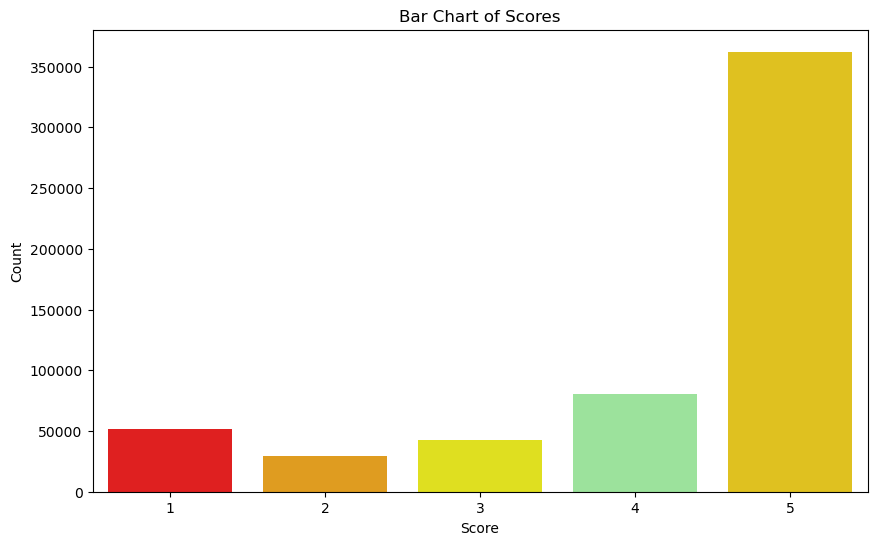

In [16]:

# Ensure scores are sorted correctly and handle missing values
score_counts = df['Score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Custom palette with a more yellowish color for the score 5
custom_palette = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'gold'}

# Bar charts for individual scores
plt.figure(figsize=(10,6))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=custom_palette, dodge=False)
plt.title("Bar Chart of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()

1. **Score Distribution**:
   - **Score 1**: Approximately 50,000 instances (red bar)
   - **Score 2**: Approximately 25,000 instances (orange bar)
   - **Score 3**: Approximately 40,000 instances (yellow bar)
   - **Score 4**: Approximately 100,000 instances (green bar)
   - **Score 5**: Approximately 350,000 instances (gold bar)

2. **Skewed Data**: The chart indicates a significant skew towards the highest score (5), suggesting a large number of positive scores in the sample.

3. **Data Imbalance**: The imbalance in the score distribution highlights the need for sampling techniques to balance the data for more accurate analysis.

To address this imbalance, you can consider using techniques such as undersampling, oversampling, or synthetic data generation (e.g., SMOTE) to create a more balanced dataset.

In [17]:


# Define the undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Extract features and target
X = df.drop(columns=['Score'])  # Assuming other features exist
y = df['Score']

# Apply undersampling
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Create a new DataFrame with balanced data
df_balanced = pd.DataFrame(X_resampled)
df_balanced['Score'] = y_resampled

# Check the size of the balanced DataFrame
print(df_balanced.shape)

(148635, 10)


In [18]:
print(df_balanced.size)
print(df_balanced.shape)

1486350
(148635, 10)


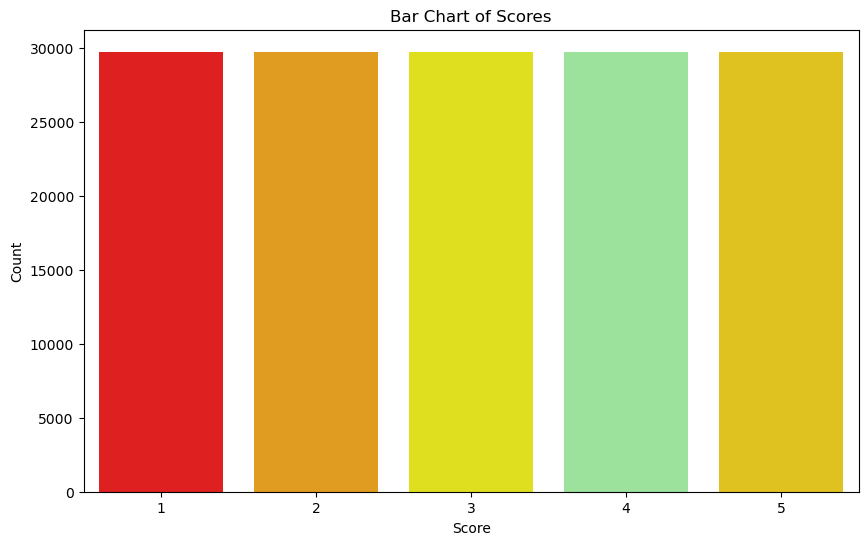

In [19]:
# Ensure scores are sorted correctly and handle missing values
score_counts = df_balanced['Score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Custom palette with a more yellowish color for the score 5
custom_palette = {1: 'red', 2: 'orange', 3: 'yellow', 4: 'lightgreen', 5: 'gold'}

# Bar charts for individual scores
plt.figure(figsize=(10,6))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette=custom_palette, dodge=False)
plt.title("Bar Chart of Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()

Sentiment
Negative    59454
Positive    59454
Neutral     29727
Name: count, dtype: int64


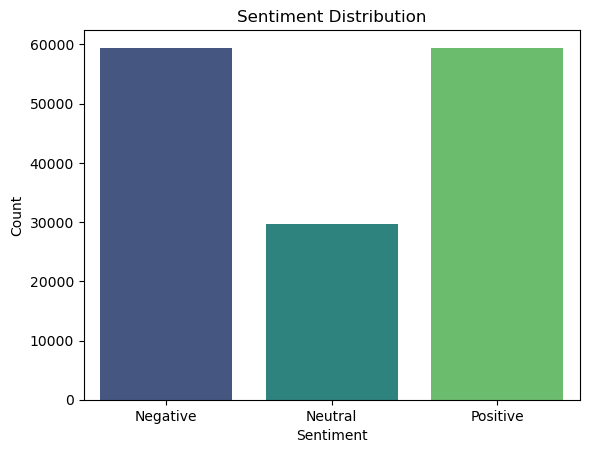

In [20]:


# Convert Score into Sentiment
def get_sentiment(score):
    if score > 3:
        return "Positive"
    elif score == 3:
        return "Neutral"
    else:
        return "Negative"

df_balanced['Sentiment'] = df_balanced['Score'].apply(get_sentiment)

# Display sentiment counts
print(df_balanced['Sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x=df_balanced['Sentiment'], hue=df_balanced['Sentiment'], palette='viridis', dodge=False, legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [21]:
print(df_balanced.size)
print(df_balanced.shape)

1634985
(148635, 11)


In [22]:
df_balanced.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Sentiment'],
      dtype='object')

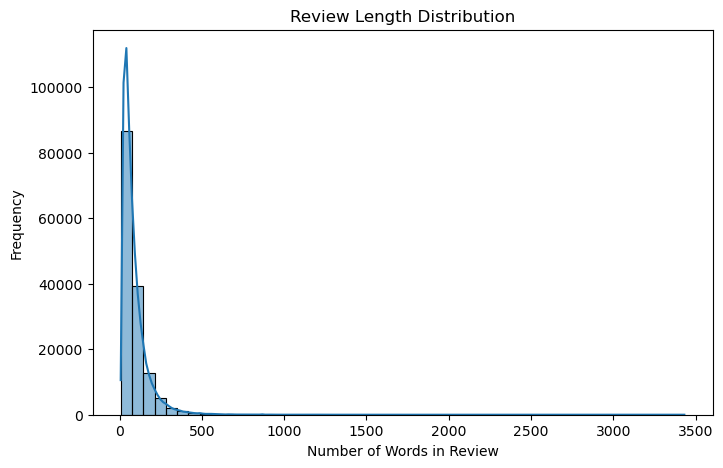

In [24]:
# Review text length distribution
df_balanced['Review_Length'] = df_balanced['Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df_balanced['Review_Length'], bins=50, kde=True)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()

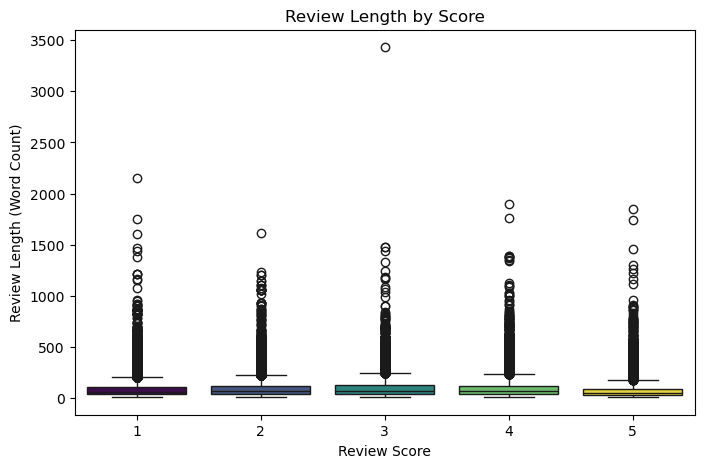

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Score", y="Review_Length", data=df_balanced, hue="Score", palette='viridis', legend=False)
plt.title("Review Length by Score")
plt.xlabel("Review Score")
plt.ylabel("Review Length (Word Count)")
plt.show()

✅ **Insight:** This helps analyze whether longer reviews tend to be more positive or negative.

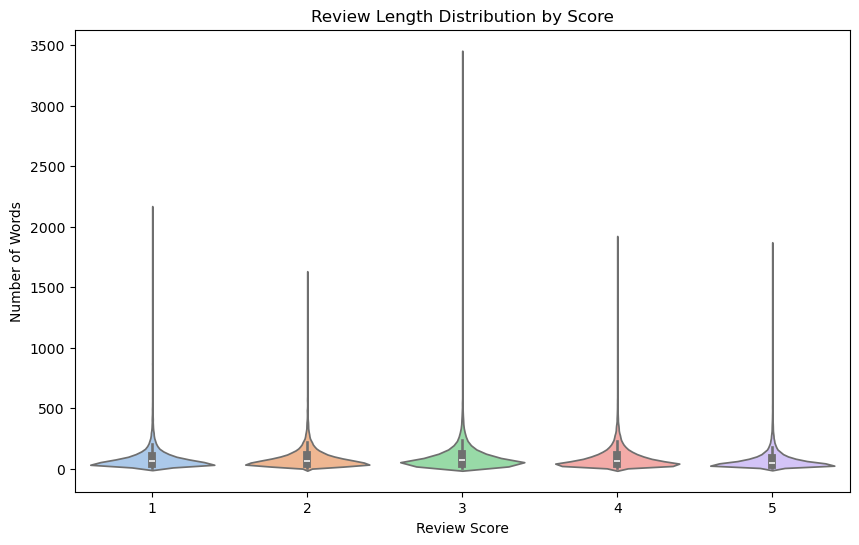

In [26]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Score'], y=df_balanced['Review_Length'], palette='pastel',legend=False,hue=df_balanced['Score'])
plt.title("Review Length Distribution by Score")
plt.xlabel("Review Score")
plt.ylabel("Number of Words")
plt.show()

# Data Preprocessing and Feature Engineering

**Expected Outcomes for Data Preprocessing**
- Perform text cleaning (removing stopwords, punctuation, special characters, etc.).
- Convert text data into numerical format using techniques like TF-IDF, Word2Vec, or BERT embeddings.
- Generate word clouds, n-grams, and other insights.

In [27]:
# Text Cleaning
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df_balanced['Cleaned_Text'] = df_balanced['Text'].apply(clean_text)

In [28]:
# Removing Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df_balanced['Cleaned_Text'] = df_balanced['Cleaned_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# Tokenization & Lemmatization
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df_balanced['Cleaned_Text'] = df_balanced['Cleaned_Text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Convert Text into Numerical Format (BERT Tokenization)
from transformers import BertTokenizer

#  Load BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

#  Tokenize & Convert to Numerical Format
df['Tokenized'] = df_balanced['Cleaned_Text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))


In [31]:
df_balanced.Sentiment.describe()

count       148635
unique           3
top       Negative
freq         59454
Name: Sentiment, dtype: object

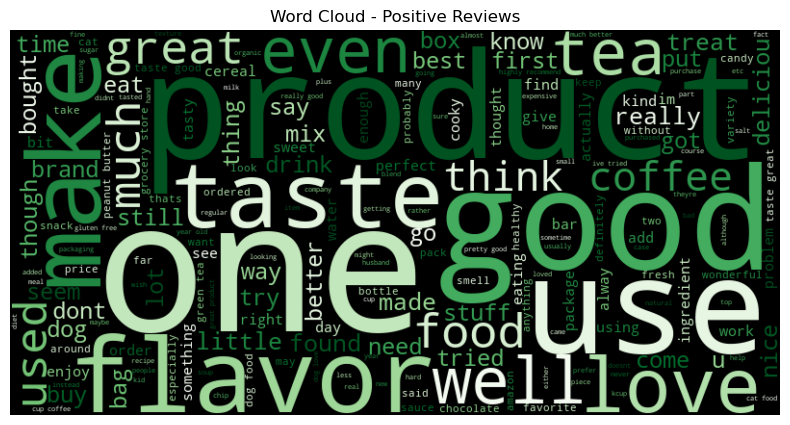

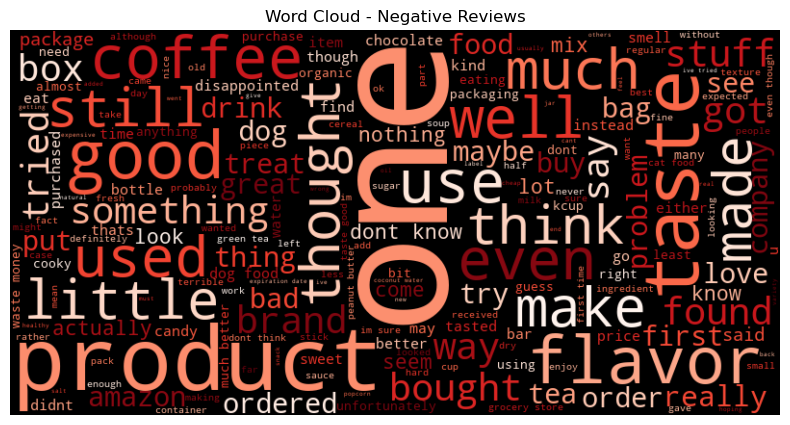

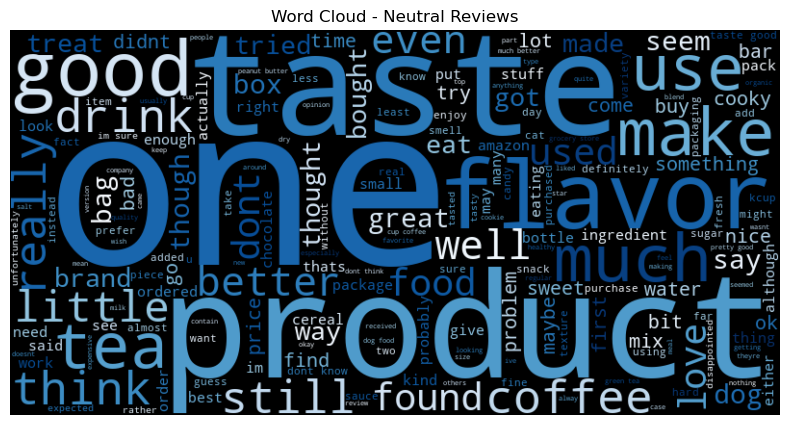

In [32]:
# ✅ Generate Word Cloud for Positive Reviews (Score > 3)
positive_reviews = ' '.join(df_balanced[df_balanced['Score'] > 3]['Cleaned_Text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap="Greens").generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")
plt.show()

# ✅ Generate Word Cloud for Negative Reviews (Score ≤ 2)
negative_reviews = ' '.join(df_balanced[df_balanced['Score'] <= 2]['Cleaned_Text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap="Reds").generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")
plt.show()

# ✅ Generate Word Cloud for Neutral Reviews (Score = 3)
neutral_reviews = ' '.join(df_balanced[df_balanced['Score'] == 3]['Cleaned_Text'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='black', colormap="Blues").generate(neutral_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Neutral Reviews")
plt.show()

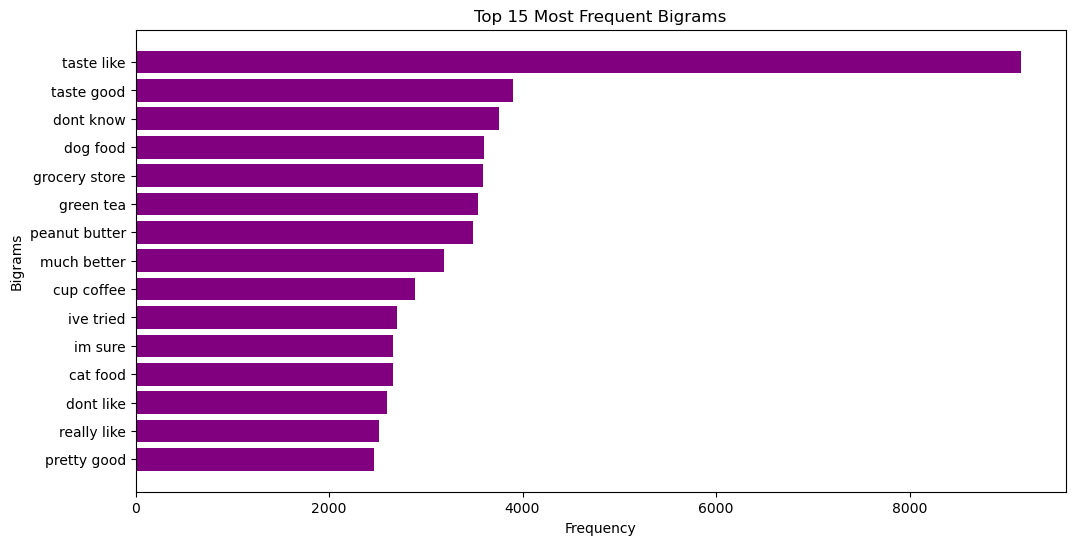

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

# ✅ Create a Bigram Vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=5000)  # Limit features to avoid memory issues
X_bigrams = vectorizer.fit_transform(df_balanced['Cleaned_Text'])

# ✅ Extract Top 15 Bigrams
bigram_sums = np.array(X_bigrams.sum(axis=0)).flatten()  # Sum across all rows (reviews)
bigram_features = vectorizer.get_feature_names_out()

# ✅ Sort and Select Top 15
top_bigrams_idx = bigram_sums.argsort()[-15:][::-1]  # Get indices of top 15 bigrams
top_bigrams = [bigram_features[i] for i in top_bigrams_idx]
top_bigrams_counts = bigram_sums[top_bigrams_idx]

# ✅ Plot Top Bigrams
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams[::-1], top_bigrams_counts[::-1], color='purple')  # Reverse for descending order
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("Top 15 Most Frequent Bigrams")
plt.show()


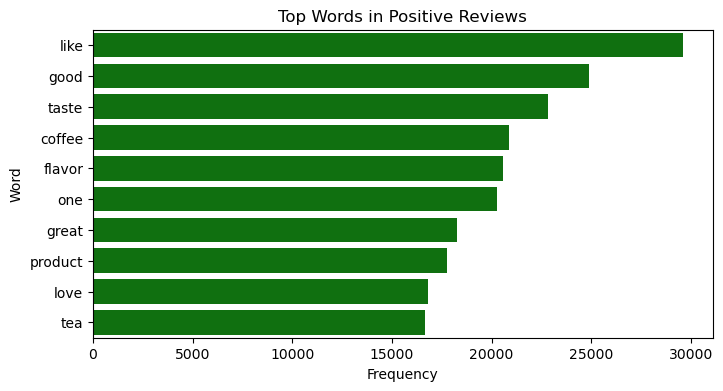

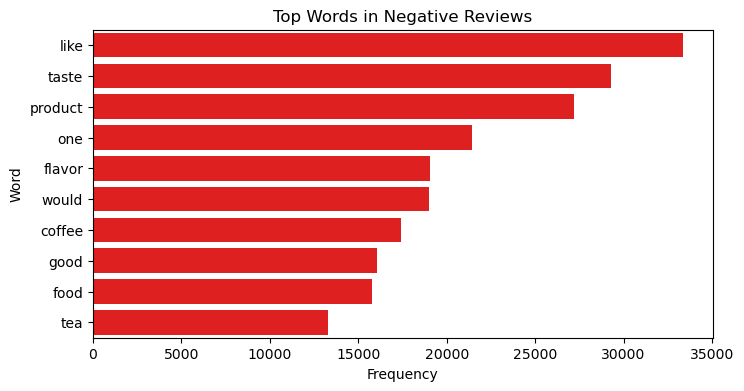

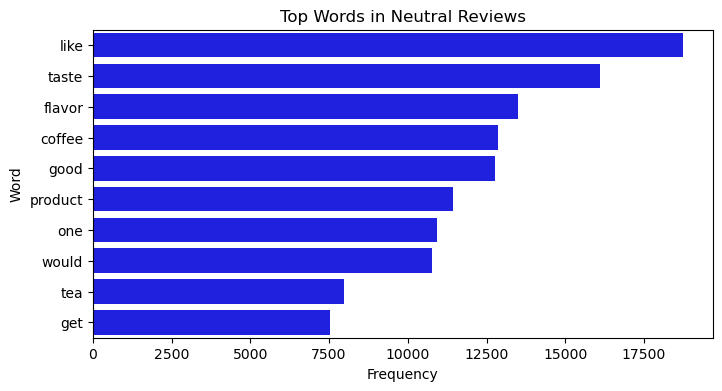

In [34]:
# Top Words by Sentiment Category
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Function to get top words
def get_top_words(text_list, n=10):
    words = " ".join(text_list).split()
    return pd.DataFrame(Counter(words).most_common(n), columns=["Word", "Count"])

# ✅ Get top words for each sentiment
top_positive = get_top_words(df_balanced[df_balanced['Sentiment'] == 'Positive']['Cleaned_Text'], 10)
top_negative = get_top_words(df_balanced[df_balanced['Sentiment'] == 'Negative']['Cleaned_Text'], 10)
top_neutral = get_top_words(df_balanced[df_balanced['Sentiment'] == 'Neutral']['Cleaned_Text'], 10)

# ✅ Function to plot top words (Fixed Warning)
def plot_top_words(df, title, color):
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df["Count"], y=df["Word"], color=color)  # ✅ Use `color` instead of `palette`
    plt.xlabel("Frequency")
    plt.title(title)
    plt.show()

# ✅ Plot Top Words for Each Sentiment
plot_top_words(top_positive, "Top Words in Positive Reviews", "green")
plot_top_words(top_negative, "Top Words in Negative Reviews", "red")
plot_top_words(top_neutral, "Top Words in Neutral Reviews", "blue")



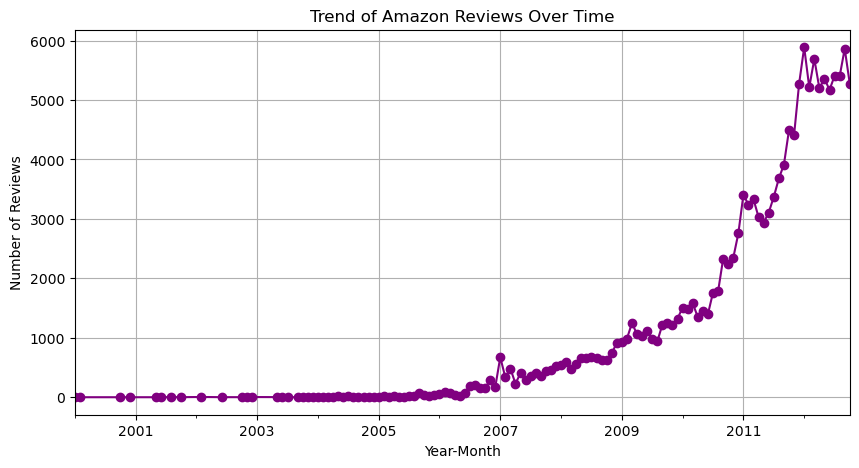

In [35]:
# we can check review trends over time.
df_balanced['Time'] = pd.to_datetime(df_balanced['Time'], unit='s')  # Convert Unix timestamp to date

# Group by Month & Year
df_balanced['YearMonth'] = df_balanced['Time'].dt.to_period('M')
monthly_reviews = df_balanced.groupby('YearMonth').size()

plt.figure(figsize=(10, 5))
monthly_reviews.plot(kind='line', marker='o', color='purple')
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.title("Trend of Amazon Reviews Over Time")
plt.grid()
plt.show()

In [36]:
from datetime import datetime

# ✅ Convert 'Time' column to datetime format if not already
df_balanced['Time'] = pd.to_datetime(df_balanced['Time'], unit='s')

# ✅ Get the most recent review
latest_review = df_balanced.loc[df_balanced['Time'].idxmax()]

# ✅ Print the review details
print(f"🔹 Most Recent Review Details 🔹\n")
print(f"📅 Date & Time: {latest_review['Time']}")
print(f"📝 Review: {latest_review['Text']}")


🔹 Most Recent Review Details 🔹

📅 Date & Time: 2012-10-26 00:00:00
📝 Review: First of all the "k-cups" were weird and the taste was not what I thought.  I would not buy this product again.


In [37]:
df_balanced

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Sentiment,Review_Length,Cleaned_Text,YearMonth
238094,238095,B000N543Y6,A3V568BDMLLAWY,"S. M. Rich ""smarsrich""",2,2,2012-05-17,Absolutely No Smell No Taste,Not even sure if this is really Dill Weed?????...,1,Negative,74,even sure really dill weed look like crushed m...,2012-05
315384,315385,B000NW8AQ6,A21SSX9JED5ZKN,Online Shopper,0,0,2012-03-05,Cans all dented,How could all the cans arrive with large dents...,1,Negative,21,could can arrive large dent think getting rid ...,2012-03
566214,566215,B004P4POZ8,APO6APIOZ9VV0,Fran,2,6,2012-06-06,Just okay,I really wanted to like this product. I've use...,1,Negative,45,really wanted like product ive used time doesn...,2012-06
145023,145024,B003MA8P02,ATZAD00EIVTF4,V. Antonjuk,4,10,2011-10-03,"Wow, I cant believe how expensive a bag of cor...","No seriously, this is ridiculous, $45 for a ba...",1,Negative,51,seriously ridiculous bag corn obligate carnivo...,2011-10
356069,356070,B002QWP8H0,A2D9ZDPJ6YJVO,Sadie,0,2,2012-04-09,Dog wont eat them,Had to buy another box of the same thing at Pe...,1,Negative,27,buy another box thing petsmart eats must fresh...,2012-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397071,397072,B001AY8VV0,A2NOYCDN4MP1LA,"azurenebula ""azurenebula""",1,1,2012-09-17,My cats are addictive!,I ordered based on the reviews. I am glad I di...,5,Positive,67,ordered based review glad cat addictive dont w...,2012-09
287706,287707,B000SARZ46,A3LY6Q5YF45H19,B. Watkins,1,1,2008-03-17,Coffee Cake/Cobbler,This is a great product. I serve it to company...,5,Positive,43,great product serve company quite often nobody...,2008-03
455321,455322,B005HG9ERW,#oc-R2XZVYL146WRFL,"Iron Man ""JON""",0,0,2012-09-17,Noticeably great tasting water compared to reg...,The Essentia 9.5 pH drinking water has a notic...,5,Positive,146,essentia ph drinking water noticeably distinct...,2012-09
523197,523198,B005YD2SDA,A3V431YLNVBNOF,Kathy,0,0,2012-08-17,Italian Cook LOVES this product,Best product for substitute of the real thing....,5,Positive,58,best product substitute real thing concentrate...,2012-08


# Model Selection, Training and Testing

**Step 1:** Splitting the Data
- Before selecting a model, we need to split our dataset into training and testing sets.

In [38]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced["Cleaned_Text"], df_balanced["Sentiment"], test_size=0.2, random_state=42
)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (118908,), Testing Data: (29727,)


**Step 2:** Convert Text to Numerical Format (TF-IDF Vectorization)
- Since machine learning models cannot process raw text, we must convert text into numerical representations. One of the most common methods is TF-IDF (Term Frequency - Inverse Document Frequency).

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Transforming text data into numerical format
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Train Shape: {X_train_tfidf.shape}, TF-IDF Test Shape: {X_test_tfidf.shape}")


TF-IDF Train Shape: (118908, 5000), TF-IDF Test Shape: (29727, 5000)


#### **🔹 Step 3:** Model Selection
- We will experiment with three models:

    1. Logistic Regression (Baseline)
    2. Random Forest (More robust model)
    3. BERT (Deep Learning model)
- Let’s start with traditional ML models.

##### 1. Logistic Regression Model

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_tfidf)

# Evaluation
print("🔹 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.75      0.82      0.78     11898
     Neutral       0.53      0.33      0.41      5855
    Positive       0.77      0.83      0.80     11974

    accuracy                           0.73     29727
   macro avg       0.68      0.66      0.66     29727
weighted avg       0.71      0.73      0.72     29727



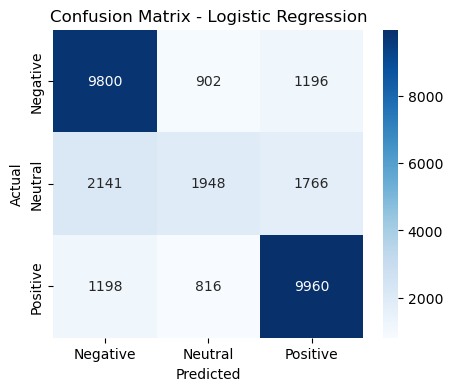

In [82]:
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [83]:
# Calculate Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log) * 100
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}%")


Logistic Regression Accuracy: 73.02%


##### 2. Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print("🔹 Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results:
              precision    recall  f1-score   support

    Negative       0.77      0.87      0.81     11898
     Neutral       0.93      0.39      0.55      5855
    Positive       0.76      0.88      0.82     11974

    accuracy                           0.78     29727
   macro avg       0.82      0.71      0.73     29727
weighted avg       0.80      0.78      0.76     29727



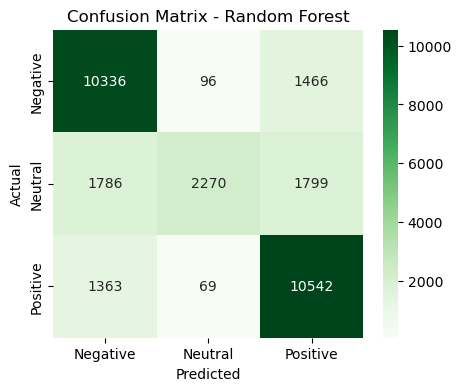

In [85]:
# Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [86]:
# Calculate Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")

Random Forest Accuracy: 77.87%


##### 3. BERT Model

**Step 1:** Before running the BERT model, installing the necessary libraries

In [87]:
%pip install transformers torch datasets

   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.1 MB 699.0 kB/s eta 0:04:52
   ---------------------------------------- 0.5/204.1 MB 699.0 kB/s eta 0:04:52
   ---------------------------------------- 0.8/204.1 MB 633.2 kB/s eta 0:05:22
   ---------------------------------------- 0.8/204.1 MB 633.2 kB/s eta 0:05:22
   ---------------------------------------- 1.0/204.1 MB 585.1 kB/s eta 0:05:48
   ---------------------------------------- 1.0/204.1 MB 585.1 kB/s eta 0:05:48
   ---------------------------------------- 1.3/204.1 MB 633.2 kB/s eta 0:05:21
   ---------------------------------------- 1.3/204.1 MB 633.2 kB/s eta 0:05:21
   --

In [ ]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

UsageError: Line magic function `%pip3` not found.


In [40]:
import torch
print(torch.__version__)
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

2.6.0+cpu
Using device: cpu


In [41]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())  # Should return True if GPU is detected

2.6.0+cpu
False


In [93]:
%pip install --upgrade transformers

Note: you may need to restart the kernel to use updated packages.


In [101]:
%pip install --upgrade pip setuptools

  Using cached setuptools-75.8.1-py3-none-any.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.7 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.3 MB/s eta 0:00:00
Using cached setuptools-75.8.1-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Success

In [102]:
%pip install torch torchvision torchaudio--index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.


  ERROR: Cannot unpack file C:\Users\DELL\AppData\Local\Temp\pip-unpack-gnn0ci5z\cpu.html (downloaded from C:\Users\DELL\AppData\Local\Temp\pip-req-build-gnfu26e7, content-type: text/html); cannot detect archive format
ERROR: Cannot determine archive format of C:\Users\DELL\AppData\Local\Temp\pip-req-build-gnfu26e7


**Step 2:** Load BERT Tokenizer and Model

In [110]:
import transformers
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [42]:
# Ensure PyTorch is installed
%pip install torch

# Import torch to ensure it is available
import torch

# Load Pretrained BERT Tokenizer and Model
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


Note: you may need to restart the kernel to use updated packages.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Step 3:** Tokenizing the Data for BERT

In [43]:
#Tokenizing the Data for BERT
# Tokenize the data
def tokenize_data(texts, tokenizer, max_length=512):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="pt")

# Tokenizing Train & Test Data
train_encodings = tokenize_data(X_train, tokenizer)
test_encodings = tokenize_data(X_test, tokenizer)

# Convert labels to tensors
train_labels = torch.tensor(y_train.factorize()[0])
test_labels = torch.tensor(y_test.factorize()[0])


**Step 4:** Create DataLoaders for BERT

In [44]:
#Create DataLoaders for BERT
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets
train_dataset = TensorDataset(train_encodings["input_ids"], train_encodings["attention_mask"], train_labels)
test_dataset = TensorDataset(test_encodings["input_ids"], test_encodings["attention_mask"], test_labels)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


**Step 5:** Train BERT Model

In [45]:
#Train BERT Model
from transformers import AdamW

# Optimizer
optimizer = AdamW(bert_model.parameters(), lr=2e-5)

# Loss Function
loss_fn = torch.nn.CrossEntropyLoss()

# Move Model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

c:\Users\DELL\anaconda3\Lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

**Step 6:** Training Loop for BERT

In [ ]:
#Training Loop for BERT
from tqdm import tqdm

epochs = 3  # You can increase for better accuracy

for epoch in range(epochs):
    bert_model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9616\360855836.py:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
c:\Users\DELL\anaconda3\Lib\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(
  0%|          | 0/14864 [00:00<?, ?it/s]

C:\Users\DELL\AppData\Local\Temp\ipykernel_9616\360855836.py:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
c:\Users\DELL\anaconda3\Lib\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
  0%|          | 1/14864 [00:40<166:54:45, 40.43s/it]


KeyboardInterrupt: 

**Step 7:** Evaluate BERT Model

In [ ]:
#Evaluate BERT Model
bert_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"✅ BERT Accuracy: {accuracy * 100:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get Predictions for Test Data
bert_model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate Confusion Matrix
cm_bert = confusion_matrix(all_labels, all_predictions)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Reds", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT Model")
plt.show()


In [ ]:
# Convert predictions to numpy array
accuracy_bert = accuracy_score(all_labels, all_predictions) * 100
print(f"BERT Model Accuracy: {accuracy_bert:.2f}%")


# Testing on New and Unseen data

In [ ]:
def predict_sentiment(text, model, tokenizer):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()
    
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[prediction]

# Take user input and predict sentiment
user_input = input("Enter a review: ")
predicted_sentiment = predict_sentiment(user_input, bert_model, tokenizer)
print(f"Predicted Sentiment: {predicted_sentiment}")
